In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [28]:
net = pd.read_csv('datasets\\Internet-Demographic.csv')

In [29]:
net

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [30]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    195 non-null    object 
 1   Country Code    195 non-null    object 
 2   Birth rate      195 non-null    float64
 3   Internet users  195 non-null    float64
 4   Income Group    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [31]:
net.describe()

,Birth rate,Internet users
count,195.000000,195.000000
mean,21.469928,42.076471
std,10.605467,29.030788
min,7.900000,0.900000
25%,12.120500,14.520000
50%,19.680000,41.000000
75%,29.759500,66.225000
max,49.661000,96.546800


In [32]:
net['Country Name'] = net['Country Name'].astype('category')
net['Income Group'] = net['Income Group'].astype('category')

In [33]:
net.dtypes

Country Name      category
Country Code        object
Birth rate         float64
Internet users     float64
Income Group      category
dtype: object

<h1>#1. Distribution of Birth rates</h1>

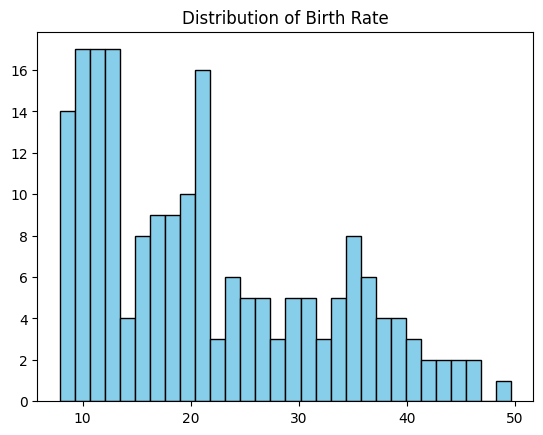

In [34]:
plt.hist(net['Birth rate'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Birth Rate')
plt.show()

<h1>#2. TOP 5 INTERNET USERS</h1>

In [35]:
net['Internet users'].mean()

np.float64(42.07647089194872)

In [36]:
net2 = net[net['Internet users'] > 42]

In [37]:
net2['Internet users'].mean()

np.float64(67.686133746875)

In [38]:
net3 = net2[net2['Internet users'] > 67]

In [39]:
net3['Internet users'].mean()

np.float64(81.75577865999999)

In [40]:
net4 = net2[net2['Internet users'] > 94]

In [41]:
net4

,Country Name,Country Code,Birth rate,Internet users,Income Group
22,Bermuda,BMU,10.4,95.3000,High income
47,Denmark,DNK,10.0,94.6297,High income
84,Iceland,ISL,13.4,96.5468,High income
131,Norway,NOR,11.6,95.0534,High income
163,Sweden,SWE,11.8,94.7836,High income


<h1>#3. Count of Countries of by Income Group</h1>

In [42]:
net['Income Group'].value_counts()

Income Group
High income            67
Lower middle income    50
Upper middle income    48
Low income             30
Name: count, dtype: int64

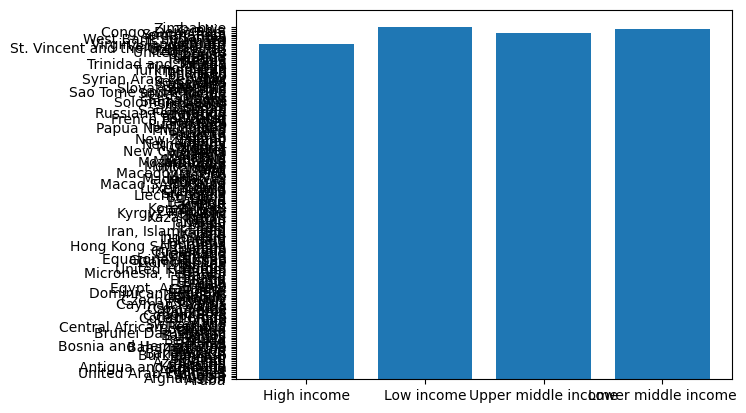

In [43]:
plt.bar(net['Income Group'], net['Country Name'])
plt.show()

<h1>#4. Box Plot of Internet Usage</h1>

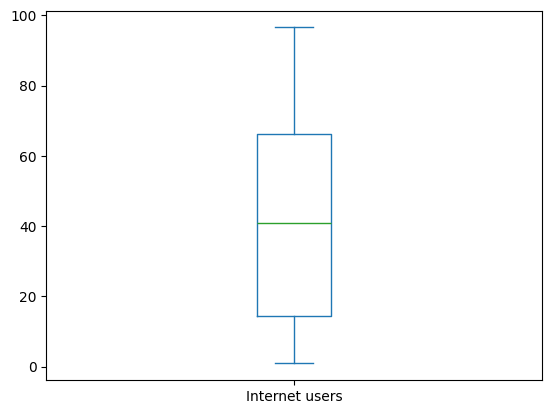

In [44]:
net['Internet users'].plot(kind='box')
plt.show()

<h1>#5. Countries with No Internet Access</h1>

In [45]:
net['Internet users'].min()

np.float64(0.9)

In [46]:
net['Country Name'].value_counts()

Country Name
Afghanistan              1
Albania                  1
Algeria                  1
Angola                   1
Antigua and Barbuda      1
                        ..
Virgin Islands (U.S.)    1
West Bank and Gaza       1
Yemen, Rep.              1
Zambia                   1
Zimbabwe                 1
Name: count, Length: 195, dtype: int64

<h1>#6. Average Birth rate</h1>

In [47]:
net['Birth rate'].min()

np.float64(7.9)

In [48]:
net['Birth rate'].mean()

np.float64(21.469928205128202)

<h1>#7. Scatterplot</h1>

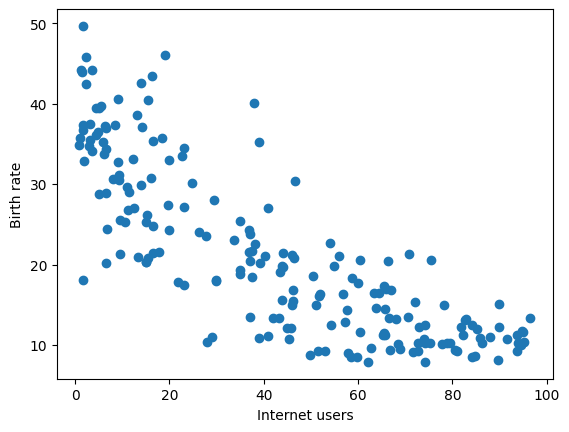

In [49]:
plt.scatter(net['Internet users'], net['Birth rate'])
plt.xlabel('Internet users')
plt.ylabel('Birth rate')
plt.show()

<h1>#8. Countries with Birth rates above 40</h1>

In [50]:
net['Birth rate'].mean()

np.float64(21.469928205128202)

In [24]:
net = net[net['Birth rate'] > 40]
net

,Country Name,Country Code,Birth rate,Internet users,Income Group
2,Angola,AGO,45.985,19.1,Upper middle income
11,Burundi,BDI,44.151,1.3,Low income
14,Burkina Faso,BFA,40.551,9.1,Low income
65,"Gambia, The",GMB,42.525,14.0,Low income
115,Mali,MLI,44.138,3.5,Low income
127,Niger,NER,49.661,1.7,Low income
128,Nigeria,NGA,40.045,38.0,Lower middle income
156,Somalia,SOM,43.891,1.5,Low income
167,Chad,TCD,45.745,2.3,Low income
178,Uganda,UGA,43.474,16.2,Low income


<h1>#9. Pie chart</h1>

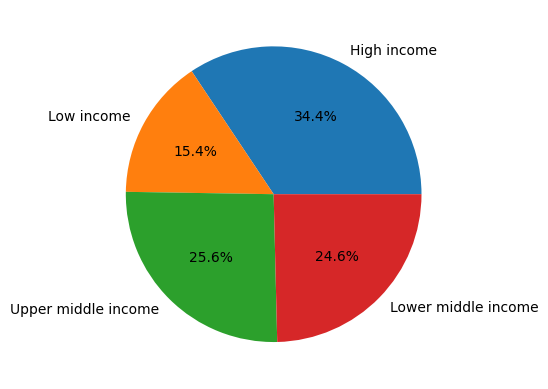

In [51]:
income = net.groupby(['Income Group']).size()

plt.pie(income, autopct = '%1.1f%%', labels= net['Income Group'].unique())
plt.show()

<h1>Correlation Between Birth Rate and Internet Usage</h1>

In [26]:
net['Birth rate'].corr(net['Internet users'])

np.float64(-0.5002604482447843)